In [136]:
import os
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'C:\\Users\\Andyy\\Desktop'

In [4]:
dta = pd.read_csv("C:\\Users\\Andyy\\Downloads\\complete stock pr.csv")

In [11]:
dta.date = pd.to_datetime(dta.date, format='%Y%m%d')
dta.PRC = abs(dta.PRC)
dta.drop(['PERMNO', 'COMNAM', 'MMCNT', 'ASKHI', 'CUSIP', 'VOL', 'SHROUT', 'OPENPRC', 'NUMTRD'], axis=1, inplace=True)

In [52]:
dta.dropna(inplace=True)

In [54]:
table = pd.pivot_table(dta, values='PRC', index=['date'], columns=['TICKER'])
pct_tab = table.pct_change()
pct_tab.replace(0, np.nan, inplace=True)
pct2_tab = (1+pct_tab).rolling(window=2).apply(np.prod, raw=True)-1
pct5_tab = (1+pct_tab).rolling(window=5).apply(np.prod, raw=True)-1
pct10_tab = (1+pct_tab).rolling(window=10).apply(np.prod, raw=True)-1
pct20_tab = (1+pct_tab).rolling(window=20).apply(np.prod, raw=True)-1

In [130]:
pct2_tab.replace(0, np.nan, inplace=True)
pct5_tab.replace(0, np.nan, inplace=True)
pct10_tab.replace(0, np.nan, inplace=True)
pct20_tab.replace(0, np.nan, inplace=True)

In [147]:
record_1 = []
record_2 = []
record_5 = []
record_10 = []
record_20 = []

for i in range(3272-2):
    short_list1 = pct_tab.iloc[i].sort_values(ascending=False)[:10].index.to_list()
    short_list2 = pct2_tab.iloc[i].sort_values(ascending=False)[:10].index.to_list()
    short_list5 = pct5_tab.iloc[i].sort_values(ascending=False)[:10].index.to_list()
    short_list10 = pct10_tab.iloc[i].sort_values(ascending=False)[:10].index.to_list()
    short_list20 = pct20_tab.iloc[i].sort_values(ascending=False)[:10].index.to_list()
    
    record_1.append(pct2_tab[short_list1].iloc[i+2].mean())
    record_2.append(pct2_tab[short_list2].iloc[i+2].mean())
    record_5.append(pct2_tab[short_list5].iloc[i+2].mean())
    record_10.append(pct2_tab[short_list10].iloc[i+2].mean())
    record_20.append(pct2_tab[short_list20].iloc[i+2].mean())

In [153]:
from scipy import stats

In [167]:
stats.describe(record_1)

DescribeResult(nobs=3270, minmax=(-0.573344944486192, 7.279983991517543), mean=-0.014567630559062556, variance=0.041208802460963825, skewness=21.19344617517167, kurtosis=646.6795048769586)

<a list of 50 Patch objects>

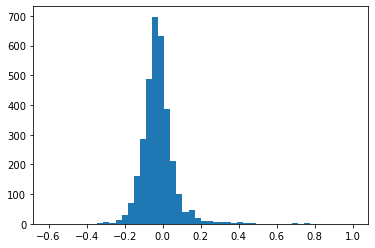

In [168]:
plt.hist(record_1, bins=50, range=(-0.6,1))[2]

In [169]:
stats.describe(record_2)

DescribeResult(nobs=3270, minmax=(-0.5539337482214695, 8.28389761580546), mean=-0.016650199579270164, variance=0.040810104361504826, skewness=25.19045353465051, kurtosis=926.4325717306028)

<a list of 50 Patch objects>

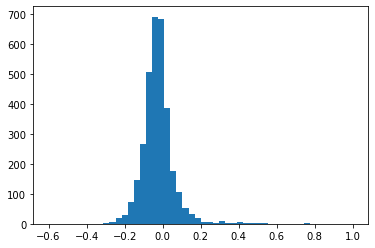

In [170]:
plt.hist(record_2, bins=50, range=(-0.6,1))[2]

In [171]:
stats.describe(record_5)

DescribeResult(nobs=3270, minmax=(-0.4218794434014685, 3.5714383247070143), mean=-0.016326284310147824, variance=0.012574802416357054, skewness=12.463976381417018, kurtosis=342.30486328772184)

<a list of 50 Patch objects>

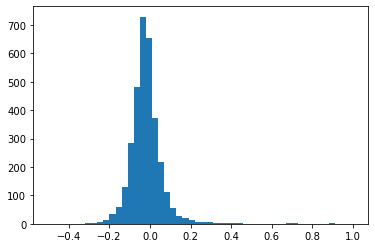

In [172]:
plt.hist(record_5, bins=50, range=(-0.5,1))[2]

In [173]:
stats.describe(record_10)

DescribeResult(nobs=3270, minmax=(-0.28288116577297334, 3.108252004306481), mean=-0.01004795510682393, variance=0.011782669715276495, skewness=14.973725907532025, kurtosis=398.4104300251406)

<a list of 50 Patch objects>

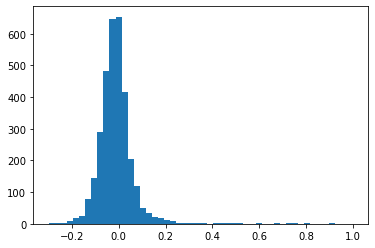

In [174]:
plt.hist(record_10, bins=50, range=(-0.3,1))[2]

In [175]:
stats.describe(record_20)

DescribeResult(nobs=3270, minmax=(-0.22120120015617273, 3.189183537176583), mean=-0.005952547857888701, variance=0.011298911484839202, skewness=16.76658013572723, kurtosis=438.0441049787341)

<a list of 50 Patch objects>

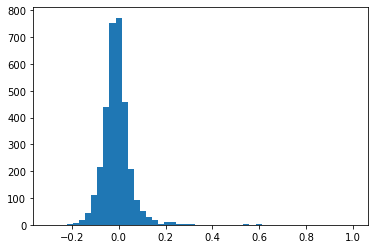

In [176]:
plt.hist(record_20, bins=50, range=(-0.3,1))[2]